# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip install lseg.data
#!pip install matplotlib
#!pip install seaborn

In [16]:
import sys
print(sys.version)

3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:52:34) [Clang 18.1.8 ]


In [2]:
import lseg.data as ld

In [3]:
ld.open_session()

<lseg.data.session.Definition object at 0x105272750 {name='workspace'}>

In [4]:
df = ld.get_data(
        universe=['TSLA.N', 'VOD.L'], 
        fields=['BID', 'ASK', 'TR.Revenue']
    )
print(df)

  Instrument      Revenue  BID  ASK
0     TSLA.N  97690000000    0    0
1      VOD.L  37448000000   86   89


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

### Numpy

In [6]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


In [7]:
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
arr[0][0]

1

In [8]:
type(arr)

numpy.ndarray

## Python Pandas

In [9]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
df


,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [10]:
#utilización de índice:
print(df.loc[1])

sesion        380
asistencia     20
Name: 1, dtype: int64


In [11]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [12]:
data = ld.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [13]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,703.79,1562681,688.5,57.313693
1,IBM,242.55,3209773,240.34,12.598702
2,GOOG.O,200.19,13830146,197.46,5.369431
3,MSFT.O,505.72,27581974,504.44,20.440539


In [14]:
#data.to_parquet('data1.parquet.gzip',
#                  compression='gzip')
data = pd.read_parquet('data1.parquet.gzip')

In [15]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,695.0,1360257,682.0901,55.34892
1,IBM,240.07,5663562,236.2,11.447415
2,GOOG.O,203.03,19573041,198.64,6.864257
3,MSFT.O,520.58,19619160,519.37,23.979545


In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [23]:
dax = ld.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [24]:
#dax.to_parquet('dax.parquet.gzip',
#                  compression='gzip')
dax = pd.read_parquet('dax.parquet.gzip')

In [26]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.87,2225025,13.306691
1,IFXGn.DE,Infineon Technologies AG,36.615,1996823,17.667943
2,SIEGn.DE,Siemens AG,233.25,659178,24.929257
3,EONGn.DE,E.ON SE,15.985,3613441,47.576671
4,DBKGn.DE,Deutsche Bank AG,31.425,4456875,91.032655
5,SATG_p.DE,Sartorius AG,197.0,123206,-8.407158
6,SAPG.DE,SAP SE,239.65,1095604,2.063876
7,BAYGn.DE,Bayer AG,26.63,1935706,39.423659
8,RWEG.DE,RWE AG,34.58,5536516,27.11406
9,HNKG_p.DE,Henkel AG & Co KGaA,71.62,447006,-12.573266


In [27]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.87,2225025,13.306691
1,IFXGn.DE,Infineon Technologies AG,36.615,1996823,17.667943
2,SIEGn.DE,Siemens AG,233.25,659178,24.929257
3,EONGn.DE,E.ON SE,15.985,3613441,47.576671
4,DBKGn.DE,Deutsche Bank AG,31.425,4456875,91.032655


In [28]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE      13.306691
IFXGn.DE      17.667943
SIEGn.DE      24.929257
EONGn.DE      47.576671
DBKGn.DE      91.032655
SATG_p.DE     -8.407158
SAPG.DE        2.063876
BAYGn.DE      39.423659
RWEG.DE        27.11406
HNKG_p.DE    -12.573266
ZALG.DE      -27.292374
DTEGn.DE       8.107441
MRCG.DE       -19.19863
PSHG_p.DE      6.195278
VOWG_p.DE     18.031972
BMWG.DE       18.504983
BEIG.DE      -17.782309
HEIG.DE       75.639894
RHMG.DE       161.16587
MTXGn.DE      19.378786
FMEG.DE       -0.955975
FREG.DE        39.01854
DHLn.DE       28.834272
ALVG.DE       29.897842
MUVGn.DE      18.638611
CONG.DE       18.322781
SHLG.DE       -7.686373
SY1G.DE      -21.895666
ADSGn.DE     -28.406442
HNRGn.DE      10.055332
DTGGe.DE      18.510564
ENR1n.DE      95.474395
MBGn.DE        6.275797
BNRGn.DE      -1.425524
CBKG.DE      140.274259
AIRG.DE       18.881012
VNAn.DE        0.059745
DB1Gn.DE      16.067633
QIA.DE        -1.637918
P911_p.DE    -17.918692
Name: YTD Total Return, dtype

In [29]:
dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]


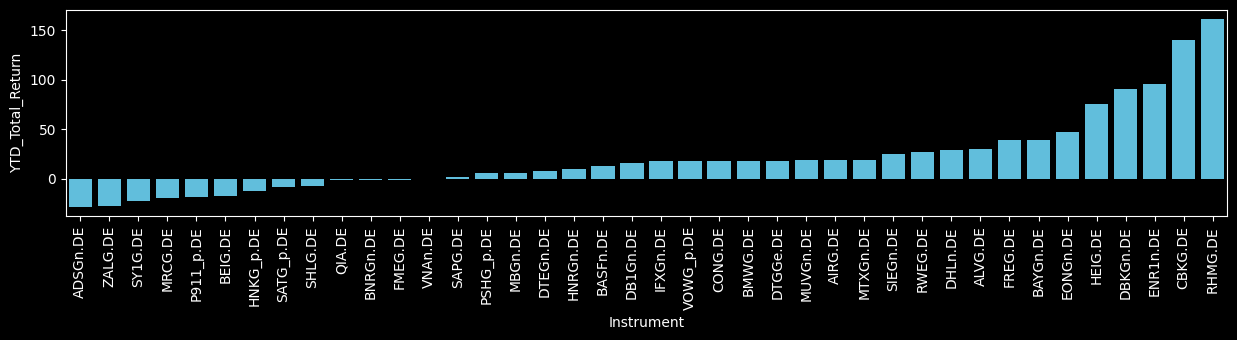

In [30]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [25]:
type(dax2)

pandas.core.frame.DataFrame

### Generen grafico para volumen de menor a mayor DJI

In [26]:
lp4 = ld.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [27]:
lp4.to_parquet('lp4.parquet.gzip',
                  compression='gzip')
lp4 = pd.read_parquet('lp4.parquet.gzip')

In [28]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,6.207,3767450.0,-17750.0
1,LP40065886,NVDA.OQ,NVIDIA CORP ORD,6.1481,11748800.0,-52958.0
2,LP40065886,AAPL.OQ,APPLE INC ORD,5.1446,7570312.0,-78637.0
3,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,3.5189,4842521.0,-12928.0
4,LP40065886,META.OQ,META PLATFORMS INC ORD,2.6901,1100372.0,-14478.0
...,...,...,...,...,...,...
3177,LP40065886,LPCN.OQ,LIPOCINE INC ORD,0.0,3009.0,-1400.0
3178,LP40065886,FGEN.OQ,FIBROGEN INC ORD,0.0,2436.0,-58482.0
3179,LP40065886,,AMBIT BIOSCIENCES CORP CVR,0.0,29736.0,0.0
3180,LP40065886,,ALEXZA PHARMACEUTICALS INC CVR,0.0,80591.0,0.0


In [29]:
xle= ld.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [30]:
xle.to_parquet('xle.parquet.gzip',
               compression='gzip')
xle = pd.read_parquet('xle.parquet.gzip')

In [31]:
xle

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.0299,56295820.0,-584164.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.0806,32538942.0,4696365.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.483,21419230.0,-222115.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.4512,20262328.0,-210112.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.4155,10039920.0,-104200.0
5,XLE,KMI.N,KINDER MORGAN INC ORD,3.9459,38376569.0,-398041.0
6,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.8034,6098701.0,-63169.0
7,XLE,OKE.N,ONEOK INC ORD,3.7309,12399894.0,-128562.0
8,XLE,SLB.N,SCHLUMBERGER NV ORD,3.6902,29794541.0,2513226.0
9,XLE,PSX.N,PHILLIPS 66 ORD,3.6627,8088239.0,-83928.0


In [32]:
xle.columns = [c.replace(' ', '_') for c in xle.columns]
list_values = ['USD CASH', 'OTHER ASSETS LESS LIABILITIES']
xle[~xle['Holding_Name'].isin(list_values)]

,Instrument,Holding_RIC,Holding_Name,Percentage_of_Fund_Assets,Number_of_Shares,Number_of_Shares_Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.0299,56295820.0,-584164.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.0806,32538942.0,4696365.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.483,21419230.0,-222115.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.4512,20262328.0,-210112.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.4155,10039920.0,-104200.0
5,XLE,KMI.N,KINDER MORGAN INC ORD,3.9459,38376569.0,-398041.0
6,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.8034,6098701.0,-63169.0
7,XLE,OKE.N,ONEOK INC ORD,3.7309,12399894.0,-128562.0
8,XLE,SLB.N,SCHLUMBERGER NV ORD,3.6902,29794541.0,2513226.0
9,XLE,PSX.N,PHILLIPS 66 ORD,3.6627,8088239.0,-83928.0


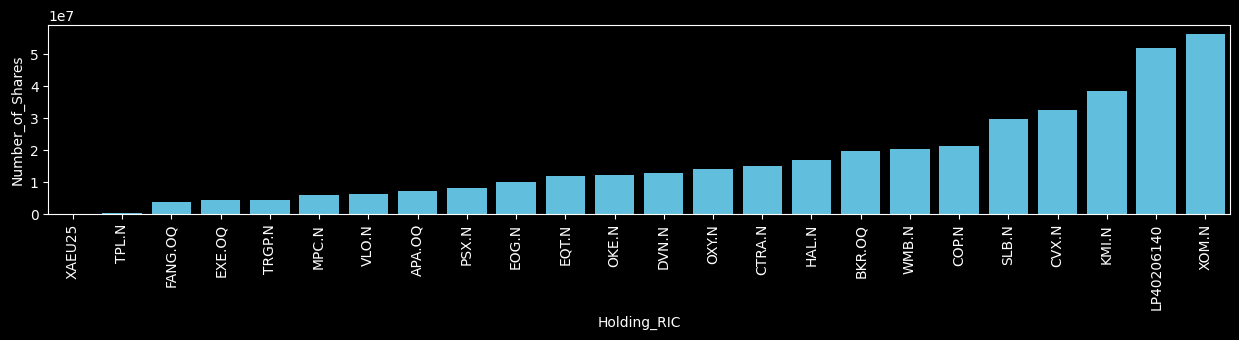

In [33]:
xle2 = xle[~xle['Holding_Name'].isin(list_values)].set_index('Holding_RIC')['Number_of_Shares'].sort_values().to_frame()
type(xle2)
bar_plot = sns.barplot(x=xle2.index, y=xle2['Number_of_Shares'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [34]:
help(ld.get_data)

Help on function get_data in module lseg.data._access_layer.get_data_func:

get_data(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str]], parameters: Union[str, dict, NoneType] = None, header_type: lseg.data.content._header_type.HeaderType = <HeaderType.TITLE: 2>) -> pandas.core.frame.DataFrame
    Retrieves pricing snapshots, as well as Fundamental and Reference data.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list
        Fields to request
    parameters: str | dict, optional
        Single key=value global parameter or dictionary of global parameters to request
    header_type: HeaderType, default HeaderType.TITLE
        If HeaderType.TITLE - returns field title as column headers for data
        If HeaderType.NAME - returns field name as column headers for data
        If HeaderType.NAME_AND_TITLE - returns field name and title as column headers for data
    
    Returns
    -------
    pandas.Dat

# Descargar series de tiempo

In [35]:
help(ld.get_history)

Help on function get_history in module lseg.data._access_layer.get_history_func:

get_history(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str], NoneType] = None, interval: Optional[str] = None, start: 'OptDateTime' = None, end: 'OptDateTime' = None, adjustments: Optional[str] = None, count: Optional[int] = None, parameters: Union[str, dict, NoneType] = None, header_type: lseg.data.content._header_type.HeaderType = <HeaderType.TITLE: 2>) -> pandas.core.frame.DataFrame
    Retrieves the pricing history, as well as Fundamental and Reference data history.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list, optional
        Fields to request
    interval: str, optional
        Date interval. Supported intervals are:
        tick, tas, taq, minute, 1min, 5min, 10min, 30min, 60min, hourly, 1h, daily,
        1d, 1D, 7D, 7d, weekly, 1W, monthly, 1M, quarterly, 3M, 6M, yearly, 1Y
    start: str or date or dateti

In [36]:
import datetime as dt
today = dt.date.today()
delta_day = today - dt.timedelta(days=100)
print(today, delta_day)

2025-08-14 2025-05-06


In [37]:
df_ts = ld.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = delta_day, end = today)

In [38]:
df_ts.to_parquet('df_ts.parquet.gzip',
               compression='gzip')
df_ts = pd.read_parquet('df_ts.parquet.gzip')

In [39]:
df_ts

000001.SZ,BID,ASK
Date,,
2025-05-07,11.02,11.03
2025-05-08,11.07,11.08
2025-05-09,11.14,11.15
2025-05-12,11.16,11.17
2025-05-13,11.29,11.3
...,...,...
2025-08-08,12.39,12.4
2025-08-11,12.3,12.31
2025-08-12,12.33,12.34


# Estadística Básica

In [41]:
portfolio = dax['Instrument'][0:10].tolist()
portfolio

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 'HNKG_p.DE']

In [42]:
df_ts = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")

prices = df_ts.rename(columns={'Price Close': portfolio[0]})
prices

BASFn.DE,BASFn.DE
Date,
2025-05-06,42.38
2025-05-07,42.24
2025-05-08,42.86
2025-05-09,43.25
2025-05-12,44.63
...,...
2025-08-08,45.48
2025-08-11,44.75
2025-08-12,44.82


In [43]:
for i in [1,2,3]:
    print(i)

1
2
3


In [44]:
for i in portfolio[1:]:
    print(i)
    w = ld.get_history([i], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")
    w1 = w.rename(columns={'Price Close': i})
    prices = prices.join(w1, lsuffix="_left", rsuffix="_right")

IFXGn.DE
SIEGn.DE
EONGn.DE
DBKGn.DE
SATG_p.DE
SAPG.DE
BAYGn.DE
RWEG.DE
HNKG_p.DE


In [45]:
prices

,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
Date,,,,,,,,,,
2025-05-06,42.38,29.395,208.95,15.695,23.705,233.8,264.35,24.05,33.2,68.62
2025-05-07,42.24,30.25,209.15,15.785,23.58,225.7,261.5,23.44,32.76,68.74
2025-05-08,42.86,30.99,213.2,15.55,23.715,228.0,262.8,23.42,32.68,68.4
2025-05-09,43.25,31.455,214.05,15.55,24.165,229.7,261.65,24.045,32.61,69.02
2025-05-12,44.63,34.03,221.75,14.885,24.68,232.0,262.5,24.06,32.48,70.58
...,...,...,...,...,...,...,...,...,...,...
2025-08-08,45.48,35.46,232.4,15.93,31.05,181.0,250.1,25.715,35.9,69.8
2025-08-11,44.75,35.285,228.05,15.89,31.15,183.55,249.35,25.71,35.55,69.88
2025-08-12,44.82,36.775,231.1,15.82,30.995,197.15,232.0,25.96,35.52,71.54


In [46]:
prices.describe()

,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
count,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0
mean,43.033014,35.252945,219.605479,15.658151,25.861027,210.057534,257.638356,26.177603,34.853836,68.67589
std,1.219313,1.777267,6.030142,0.373083,2.168458,15.231995,8.355581,1.669556,1.576504,1.543301
min,41.28,29.395,207.9,14.695,23.58,177.5,232.0,22.17,32.08,65.8
25%,42.09,34.315,214.95,15.405,24.41,202.3,251.65,24.93,33.2,67.5
50%,42.69,35.3,219.05,15.66,25.13,211.0,259.5,26.435,35.52,68.5
75%,43.52,36.435,224.2,15.89,26.0,221.3,264.05,27.495,36.17,70.02
max,45.87,38.505,233.25,16.49,31.425,233.8,272.35,29.21,37.69,71.88


In [50]:
prices = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")


prices['Close'] = prices['Price Close'].astype(float)
prices[portfolio[0]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
daily_returns = prices.drop(['Price Close', 'Close'], axis=1)
daily_returns 

BASFn.DE,BASFn.DE
Date,
2025-05-09,NaN
2025-05-16,0.003462
2025-05-23,-0.046937
2025-05-30,0.023626
2025-06-06,-0.013057
2025-06-13,0.006431
2025-06-20,-0.015311
2025-06-27,0.033194
2025-07-04,-0.028384


In [51]:
for instrument in range(1,len(portfolio)):
    print(instrument, portfolio[instrument])
    prices = ld.get_history([portfolio[instrument]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    prices['Close'] = prices['Price Close'].astype(float)
    prices[portfolio[instrument]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
    prices = prices.drop(['Price Close', 'Close'], axis=1)
    daily_returns = daily_returns.join(prices)

1 IFXGn.DE
2 SIEGn.DE
3 EONGn.DE
4 DBKGn.DE
5 SATG_p.DE
6 SAPG.DE
7 BAYGn.DE
8 RWEG.DE
9 HNKG_p.DE


In [52]:
daily_returns

,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
Date,,,,,,,,,,
2025-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-16,0.003462,0.059848,0.027191,-0.050109,0.031768,0.004777,0.017428,-0.050101,-0.016386,0.016952
2025-05-23,-0.046937,-0.000150,-0.035400,0.056520,-0.035084,-0.062115,-0.021641,0.067826,0.008381,-0.002567
2025-05-30,0.023626,0.026160,-0.002358,-0.014157,0.011353,-0.027578,0.020326,0.010567,0.023825,0.006548
2025-06-06,-0.013057,0.046321,0.032516,-0.005198,0.013861,-0.026412,0.023968,0.066470,0.010210,-0.008263
2025-06-13,0.006431,-0.013461,-0.017753,0.008756,-0.033762,0.000486,-0.066805,0.038770,0.061415,-0.036124
2025-06-20,-0.015311,-0.034466,-0.026637,0.005795,0.004804,0.040043,-0.014232,-0.029357,-0.011019,-0.020378
2025-06-27,0.033194,0.041219,0.062281,0.005443,0.080251,0.034447,0.026909,0.010809,0.015784,0.011439
2025-07-04,-0.028384,0.031468,-0.030772,0.013321,-0.060240,-0.010894,-0.009737,-0.029342,0.014712,0.015739


In [53]:
correlacion = daily_returns.corr()
print(correlacion)

           BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE  \
BASFn.DE   1.000000  0.024548  0.810161 -0.449506  0.780824   0.228893   
IFXGn.DE   0.024548  1.000000  0.461148 -0.171182 -0.030111   0.407649   
SIEGn.DE   0.810161  0.461148  1.000000 -0.444695  0.803006   0.318185   
EONGn.DE  -0.449506 -0.171182 -0.444695  1.000000 -0.477018  -0.207805   
DBKGn.DE   0.780824 -0.030111  0.803006 -0.477018  1.000000   0.096070   
SATG_p.DE  0.228893  0.407649  0.318185 -0.207805  0.096070   1.000000   
SAPG.DE   -0.045498  0.804496  0.424208 -0.185855  0.189584   0.244551   
BAYGn.DE  -0.045455 -0.300846 -0.141600  0.343936 -0.166290  -0.356384   
RWEG.DE    0.082905  0.095216 -0.040308  0.250316 -0.350077   0.104604   
HNKG_p.DE  0.522861  0.389931  0.629802 -0.338593  0.546189  -0.054064   

            SAPG.DE  BAYGn.DE   RWEG.DE  HNKG_p.DE  
BASFn.DE  -0.045498 -0.045455  0.082905   0.522861  
IFXGn.DE   0.804496 -0.300846  0.095216   0.389931  
SIEGn.DE   0.424208 -0.141

<Axes: >

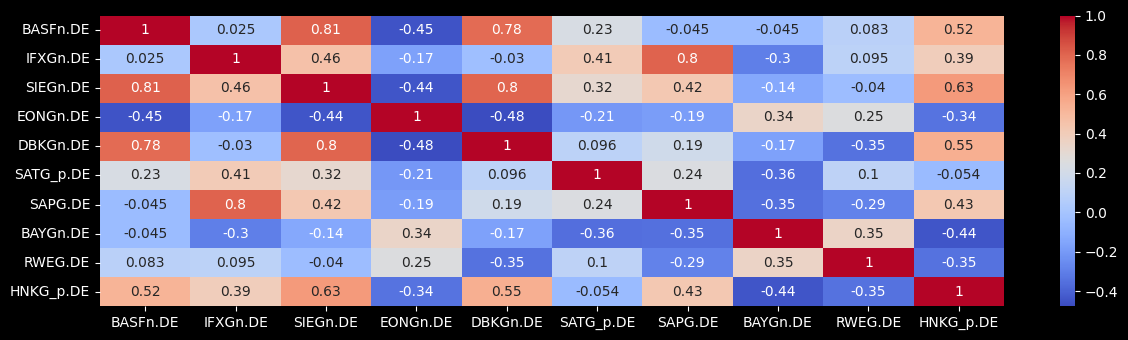

In [54]:
sns.heatmap(daily_returns.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')